# Experiment 1: VUS / Buffer & Step comparison / TSB

## Buffer comparison

### Read data

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import importlib

from tqdm import tqdm
from tqdm.notebook import tqdm_notebook
tqdm_notebook.pandas()

project_root_path = os.path.join('..', '..')
experiment_path = os.path.join(project_root_path, 'experiments', 'vus_buffer_comparison_tsb')
results_path = os.path.join(experiment_path, 'results')

save_fig_path = os.path.join(experiment_path, 'figures')
os.makedirs(save_fig_path, exist_ok=True)

%load_ext autoreload
%autoreload 2
import SylliGraph
importlib.reload(SylliGraph)
sgraph = SylliGraph.SylliGraph(experiment_path)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
formal_names = {
    'FF-VUS': 'FF-VUS',
    'FF-VUS-GPU': 'FF-VUS-GPU',
    'AUC': 'AUC',
    'VUS': 'VUS',
    'RF': 'RF',
    'AFFILIATION': 'AFFILIATION',
    'RANGE-AUC': 'Range-AUC',
}

color_palette = {
    'FF-VUS': '#99cae4',          # Good
    'FF-VUS-GPU': '#40da70',     # Very Good
    'AUC': '#f1a73f',                # Secondary competitor
    'VUS': '#b02a41',            # Main competitor
    'RF': '#a6d2c3',                    # Useless competitors
    'AFFILIATION': '#95bdaf',        # Useless competitors
    'Range-AUC': '#84a89c',       # Useless competitors
}

In [52]:
result_files = [file for file in os.listdir(results_path) if file.endswith('.csv')]
print(f'Number of result files: {len(result_files)}')

# Initialize an empty DataFrame to store the combined data
df = pd.DataFrame()

# Read and combine all files
for file in tqdm(result_files):
    file_path = os.path.join(results_path, file)
    curr_df = pd.read_csv(file_path)
    df = pd.concat([df, curr_df], ignore_index=True)
    
df['Metric'] = df['Metric'].map(formal_names)
# df = df.rename({'Metric': 'Measure', 'Metric time': 'Execution time', 'Slope size': 'Buffer size'}, axis=1)

df.sample(3)

Number of result files: 30


  0%|          | 0/30 [00:00<?, ?it/s]

100%|██████████| 30/30 [00:00<00:00, 116.48it/s]


,Time series,Length,Number of anomalies,Anomalies average length,Slope size,Step,Global mask,Slopes,Existence,Confusion matrix,...,Score mask time,Position time,Slopes time,Existence time,Confusion matrix time,Precision recall curve time,Integral time,Metric,Metric value,Metric time
54428,NAB/NAB_data_tweets_4.out,15851,3,507.666667,8,1.0,True,precomputed,optimized,dynamic_plus,...,0.000385,0.000146,0.000052,0.00015,0.000754,0.000036,0.000027,FF-VUS,0.102784,0.002702
47577,OPPORTUNITY/S3-ADL4.test.csv@80.out,27540,2,1080.000000,512,NaN,NaN,NaN,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VUS,0.517934,1.325201
32071,KDD21/055_UCR_Anomaly_DISTORTEDapneaecg2_10000...,38500,1,150.000000,2,NaN,NaN,NaN,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VUS,0.016441,0.021524


### Buffer figures

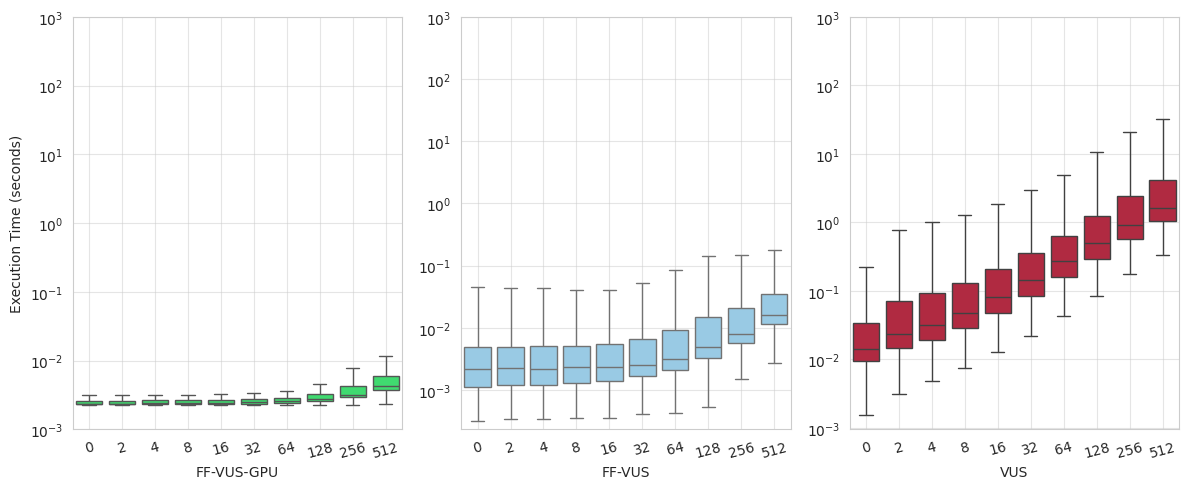

In [53]:
metrics = ['FF-VUS-GPU', 'FF-VUS', 'VUS']

fig = plt.figure(figsize=(12, 5))
for i, metric in enumerate(metrics):
    axis = fig.add_subplot(1, len(metrics), i+1)
    
    sns.boxplot(
        y='Metric time', 
        x='Slope size', 
        data=df[df['Metric'] == metric], 
        showfliers=False, 
        log_scale=True,
        color=color_palette[metric],
        saturation=1,
        ax=axis
    )
    axis.set_xlabel(metric)
    axis.set_ylabel('Execution Time (seconds)' if i == 0 else '')
    axis.tick_params(axis='x', labelrotation=15)
    axis.set_yticks([10**i for i in range(-3, 4)])
    axis.grid(axis='both', alpha=0.5)
plt.tight_layout()
plt.savefig(os.path.join(save_fig_path, 'exec_time_buffer_comparison_a.svg'))
plt.show()

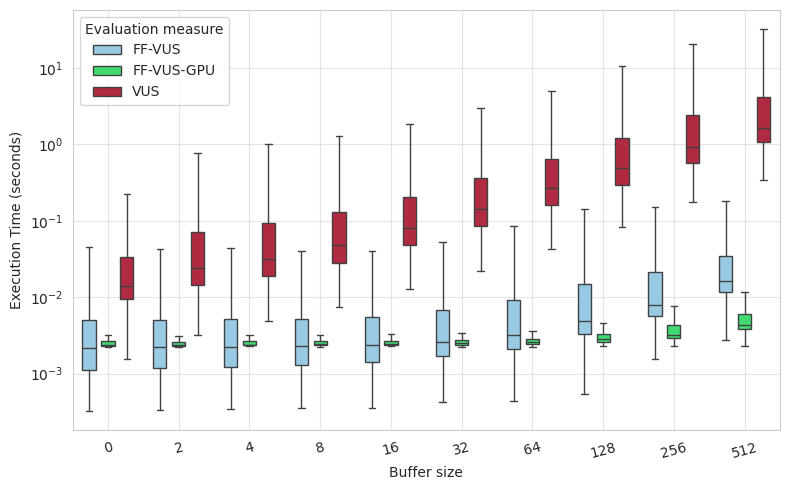

In [54]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    y='Metric time', 
    x='Slope size', 
    hue='Metric', 
    data=df, 
    showfliers=False, 
    log_scale=True, 
    palette=color_palette, 
    saturation=1,
    # fill=False, 
    gap=.3,
    # showmeans=True, 
    # meanline=True
)
plt.xlabel('Buffer size')
plt.ylabel('Execution Time (seconds)')
plt.xticks(rotation=15)
plt.grid(axis='both', alpha=0.5)
plt.legend(title='Evaluation measure')
plt.tight_layout()
plt.savefig(os.path.join(save_fig_path, 'exec_time_buffer_comparison_b.svg'))
plt.show()

## Step analysis

### Read data

In [55]:
project_root_path = os.path.join('..', '..')
step_experiment_path = os.path.join(project_root_path, 'experiments', 'vus_step_comparison_tsb')
step_results_path = os.path.join(step_experiment_path, 'results')

step_save_fig_path = os.path.join(experiment_path, 'figures')
os.makedirs(step_save_fig_path, exist_ok=True)

In [56]:
step_formal_names = {
    'FF-VUS': 'FF-VUS (L: 512)',
    'FF-VUS-GPU': 'FF-VUS-GPU (L: 512)',
    'AUC': 'AUC',
    'VUS': 'VUS (L: 512)',
    'RF': 'RF',
    'AFFILIATION': 'AFFILIATION',
    'RANGE-AUC': 'Range-AUC',
}

step_color_palette = {
    'FF-VUS (L: 512)': '#99cae4',          # Good
    'FF-VUS-GPU (L: 512)': '#40da70',     # Very Good
    'AUC': '#f1a73f',                # Secondary competitor
    'VUS (L: 512)': '#b02a41',            # Main competitor
    'RF': '#a6d2c3',                    # Useless competitors
    'AFFILIATION': '#95bdaf',        # Useless competitors
    'Range-AUC': '#84a89c',       # Useless competitors
}

In [57]:
step_result_files = [file for file in os.listdir(step_results_path) if file.endswith('.csv')]
print(f'Number of result files: {len(step_result_files)}')

df_step = pd.DataFrame()
for file in tqdm(step_result_files):
    file_path = os.path.join(step_results_path, file)
    curr_df = pd.read_csv(file_path)
    df_step = pd.concat([df_step, curr_df], ignore_index=True)
    
df_step['Metric'] = df_step['Metric'].map(step_formal_names)
df_step.sample(3)

Number of result files: 20


100%|██████████| 20/20 [00:00<00:00, 110.38it/s]


,Time series,Length,Number of anomalies,Anomalies average length,Slope size,Step,Global mask,Slopes,Existence,Confusion matrix,...,Score mask time,Position time,Slopes time,Existence time,Confusion matrix time,Precision recall curve time,Integral time,Metric,Metric value,Metric time
22548,KDD21/130_UCR_Anomaly_GP711MarkerLFM5z4_4000_6...,11999,1,118.0,512,1,True,function,True,dynamic_plus,...,0.000033,0.000071,0.000193,0.000158,0.001614,0.000090,0.000036,FF-VUS-GPU (L: 512),0.155891,0.003781
15776,OPPORTUNITY/S1-ADL2.test.csv@76.out,31891,2,697.5,512,2,True,precomputed,optimized,dynamic_plus,...,0.000624,0.000274,0.001394,0.000363,0.005611,0.000151,0.000106,FF-VUS (L: 512),0.342079,0.010390
20280,GHL/01_Lev_fault_Temp_corr_seed_11_vars_23.tes...,200000,1,144.0,512,512,True,function,True,dynamic_plus,...,0.000036,0.000076,0.000221,0.000186,0.000273,0.000099,0.000042,FF-VUS-GPU (L: 512),0.007907,0.002731


### Step figures

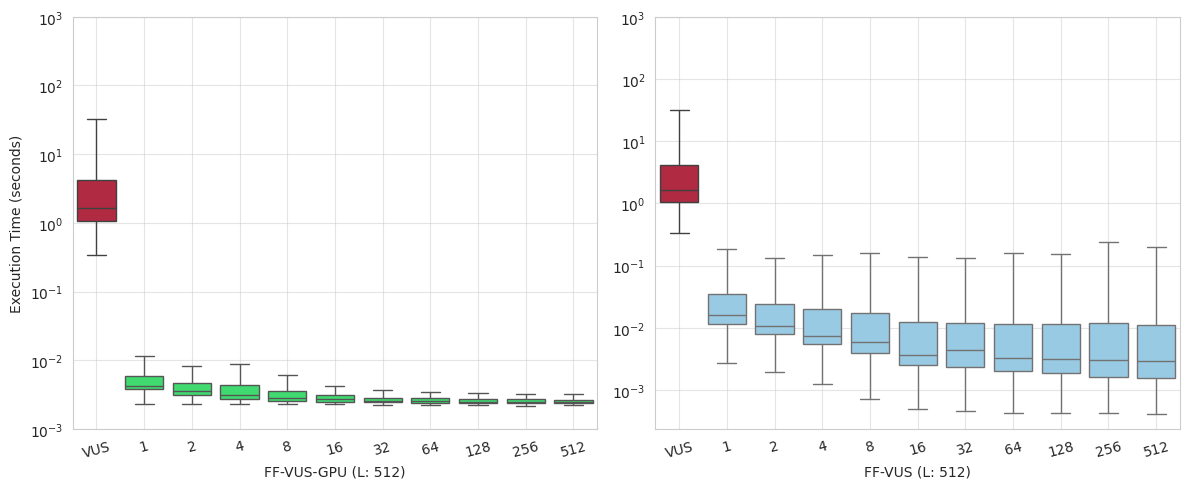

In [63]:
# TODO: Remove vus boxplot and add a dotted line on its average value
# TODO: Merge the two subplots
metrics = ['FF-VUS-GPU (L: 512)', 'FF-VUS (L: 512)']
df_vus_512 = df[np.logical_and(df['Metric'] == 'VUS', df['Slope size'] == 512)]

fig = plt.figure(figsize=(12, 5))
for i, metric in enumerate(metrics):
    axis = fig.add_subplot(1, len(metrics), i+1)

    sns.boxplot(
        y='Metric time', 
        x='Metric', 
        data=df_vus_512, 
        showfliers=False, 
        log_scale=True,
        color=color_palette['VUS'],
        saturation=1,
        ax=axis
    )
    
    sns.boxplot(
        y='Metric time', 
        x='Step', 
        data=df_step[df_step['Metric'] == metric], 
        showfliers=False, 
        log_scale=True,
        color=step_color_palette[metric],
        saturation=1,
        ax=axis
    )
    axis.set_xlabel(metric)
    axis.set_ylabel('Execution Time (seconds)' if i == 0 else '')
    axis.tick_params(axis='x', labelrotation=15)
    axis.set_yticks([10**i for i in range(-3, 4)])
    axis.grid(axis='both', alpha=0.5)
plt.tight_layout()
plt.savefig(os.path.join(step_save_fig_path, 'exec_time_step_comparison_a.svg'))
plt.show()

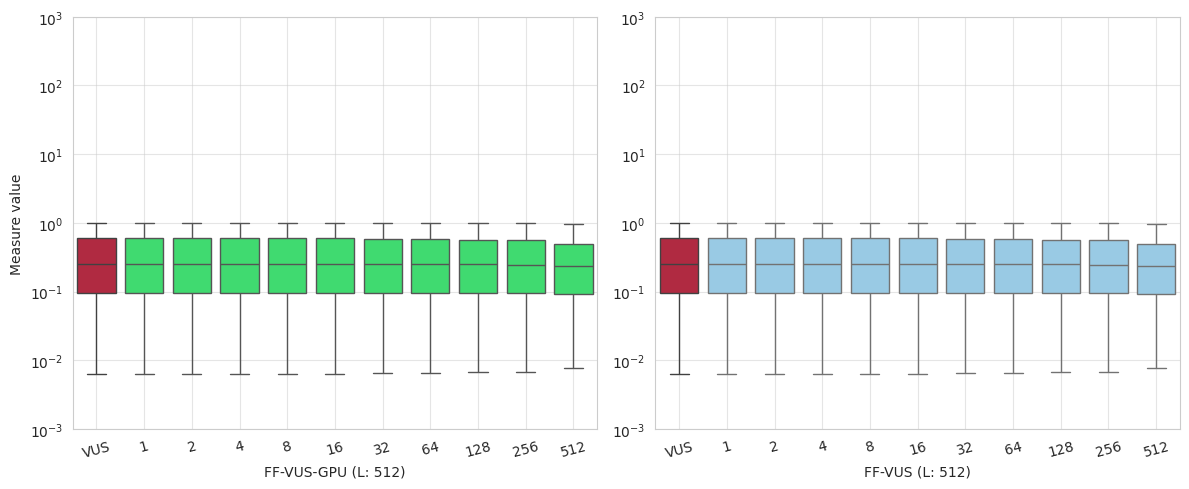

In [64]:
metrics = ['FF-VUS-GPU (L: 512)', 'FF-VUS (L: 512)']

fig = plt.figure(figsize=(12, 5))
for i, metric in enumerate(metrics):
    axis = fig.add_subplot(1, len(metrics), i+1)

    sns.boxplot(
        y='Metric value', 
        x='Metric', 
        data=df_vus_512, 
        showfliers=False, 
        log_scale=True,
        color=color_palette['VUS'],
        saturation=1,
        ax=axis
    )
    
    sns.boxplot(
        y='Metric value', 
        x='Step', 
        data=df_step[df_step['Metric'] == metric], 
        showfliers=False, 
        log_scale=True,
        color=step_color_palette[metric],
        saturation=1,
        ax=axis
    )
    axis.set_xlabel(metric)
    axis.set_ylabel('Measure value' if i == 0 else '')
    axis.tick_params(axis='x', labelrotation=15)
    axis.set_yticks([10**i for i in range(-3, 4)])
    axis.grid(axis='both', alpha=0.5)
plt.tight_layout()
# plt.savefig(os.path.join(step_save_fig_path, 'exec_time_step_comparison_b.svg'))
plt.show()

In [67]:
# df_step['Value dif. to VUS'] = 
df_vus_512_control = df_vus_512.set_index('Time series')['Metric value']

df_step['Dif. to VUS'] = df_step.apply(lambda row: row['Metric value'] - df_vus_512_control.loc[row['Time series']], axis=1)
df_step.sample(3)

,Time series,Length,Number of anomalies,Anomalies average length,Slope size,Step,Global mask,Slopes,Existence,Confusion matrix,...,Position time,Slopes time,Existence time,Confusion matrix time,Precision recall curve time,Integral time,Metric,Metric value,Metric time,Dif. to VUS
17802,SMD/machine-3-4.test.csv@34.out,23686,8,122.125,512,64,True,precomputed,optimized,dynamic_plus,...,0.000556,0.000222,0.000376,0.002835,0.000038,0.000029,FF-VUS (L: 512),0.123035,0.005673,-0.000346
30140,KDD21/076_UCR_Anomaly_DISTORTEDresperation10_4...,194999,1,1180.000,512,4,True,precomputed,optimized,dynamic_plus,...,0.000216,0.000430,0.000237,0.002490,0.000185,0.000096,FF-VUS (L: 512),0.009849,0.021374,0.000004
29243,SMD/machine-3-8.test.csv@32.out,28703,6,228.500,512,4,True,precomputed,optimized,dynamic_plus,...,0.000565,0.002823,0.000930,0.005813,0.000118,0.000080,FF-VUS (L: 512),0.112268,0.013119,-0.000028


/home/sylli/anaconda3/envs/ffvus/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:4653: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


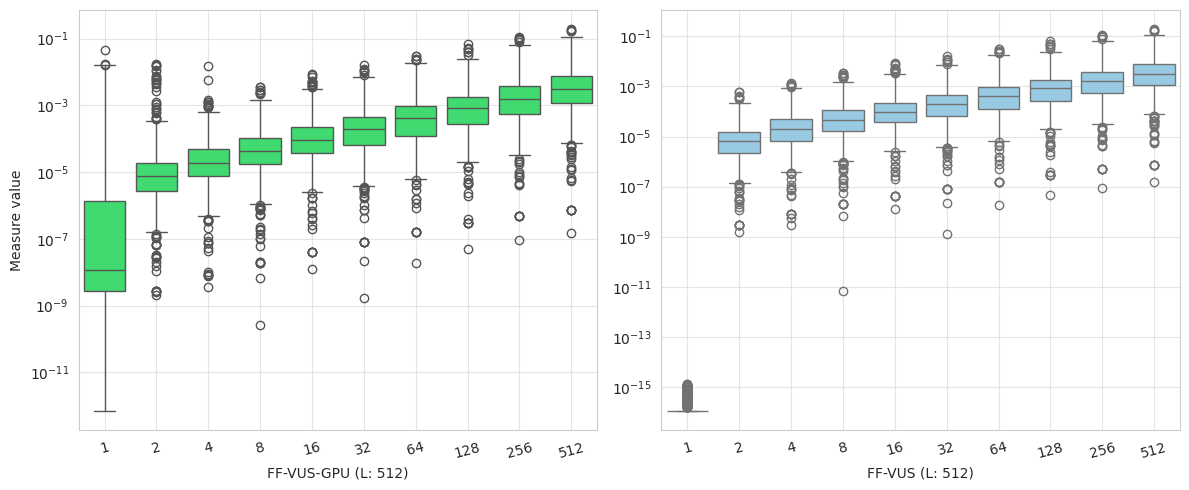

In [72]:
metrics = ['FF-VUS-GPU (L: 512)', 'FF-VUS (L: 512)']

fig = plt.figure(figsize=(12, 5))
for i, metric in enumerate(metrics):
    axis = fig.add_subplot(1, len(metrics), i+1)
    
    sns.boxplot(
        y='Dif. to VUS', 
        x='Step', 
        data=df_step[df_step['Metric'] == metric], 
        showfliers=True, 
        log_scale=True,
        color=step_color_palette[metric],
        saturation=1,
        ax=axis
    )
    axis.set_xlabel(metric)
    axis.set_ylabel('Measure value' if i == 0 else '')
    axis.tick_params(axis='x', labelrotation=15)
    # axis.set_yticks([10**i for i in range(-3, 4)])
    axis.grid(axis='both', alpha=0.5)
plt.tight_layout()
plt.savefig(os.path.join(step_save_fig_path, 'exec_time_comparison.svg'))
plt.show()